In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
def save_to_csv(file_path, X, Y):
    with open(file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for i in range(0, len(X)):
                csv_writer.writerow([X.item(i), Y.item(i)])

In [297]:
poly_reg_path = "C:\\Users\\Ihor\\GSN\\PUM\\Laboratorium 3\\FlapPyBird\\data\\polynomial_model.csv"
lin_reg_path = "C:\\Users\\Ihor\\GSN\\PUM\\Laboratorium 3\\FlapPyBird\\data\\linear_regresion.csv"
lin_reg_impl_path = "C:\\Users\\Ihor\\GSN\\PUM\\Laboratorium 3\\FlapPyBird\\data\\linear_regresion_impl.csv"

In [2]:
train_df = pd.read_csv('C://Users//Ihor//GSN//PUM//Laboratorium 3//FlapPyBird//outfile.csv')

In [3]:
train_df.head()

,x,y
0,52,68.518519
1,56,68.518519
2,60,68.518519
3,64,68.518519
4,68,68.518519


In [4]:
train_df['x'].head()

0    52
1    56
2    60
3    64
4    68
Name: x, dtype: int64

In [5]:
train_df['y'].head()

0    68.518519
1    68.518519
2    68.518519
3    68.518519
4    68.518519
Name: y, dtype: float64

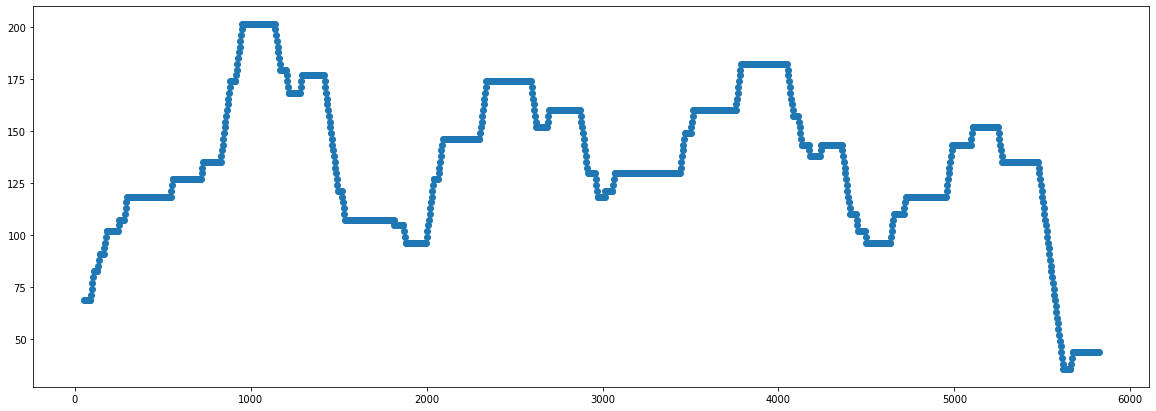

In [6]:
plt.figure(figsize=(20, 7))
plt.scatter(train_df['x'], train_df['y'])

plt.show()

## Użycie Linear Regression sk-learn

In [7]:
X_train = train_df.iloc[:, 0].values.reshape(-1, 1)
Y_train = train_df.iloc[:, 1].values.reshape(-1, 1)

<Figure size 432x288 with 0 Axes>

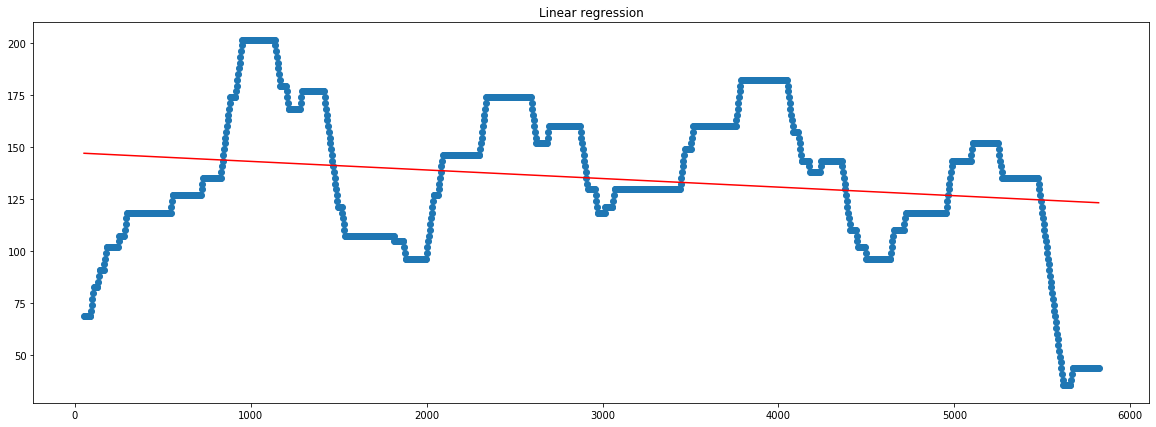

Wall time: 368 ms


In [8]:
%%time

sk_linreg = linear_model.LinearRegression()
sk_linreg = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10).fit(X_train,Y_train)
Y_Pred = sk_linreg.predict(np.array(X_train).reshape(-1, 1))
plt.figure()
plt.figure(figsize=(20, 7))
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_Pred, color='red')
plt.title('Linear regression')
plt.show()

## Użycie PolinomialFeatures + PipeLine + LinearRegression sk-learn

<Figure size 432x288 with 0 Axes>

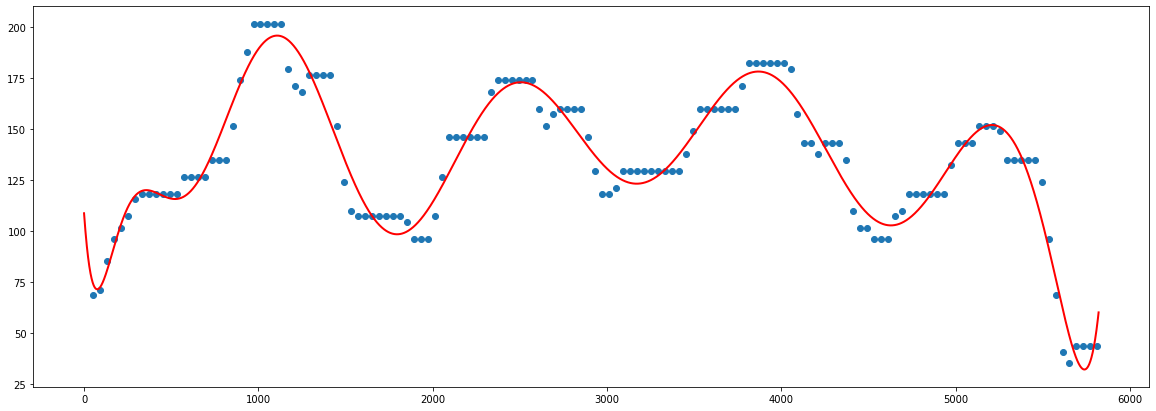

In [62]:

lastIntInX = int(X_train[-1])
X_poly_predict = np.arange(lastIntInX)
polynomial_model = make_pipeline(PolynomialFeatures(degree=15), linear_model.LinearRegression(normalize=True))
polynomial_model.fit(X_train, Y_train)
Y_poly_predict = polynomial_model.predict(X_poly_predict.reshape(-1, 1))
plt.figure()
plt.figure(figsize=(20, 7))
plt.scatter(X_train[::10], Y_train[::10])
plt.plot(X_poly_predict, Y_poly_predict, color=('red'), linewidth=2,
                      label="degree 3")
plt.show()

In [64]:
save_to_csv(lin_reg_path, X_poly_predict, Y_poly_predict)

### bez normalizacji flappy móg przelecieć tylko 3 rury, co oznacza że normalizacja dannych ma wielki wplyw na dopasowanie polymonialnej regresji linjowej
### z normalizają dopasowanie jest o wielie lepszę i flappy sprawnie kończy trasę

![](Lin_screanshot.png)

## Użycie PolinomialFeaturesPipeLine sk-learn + Ridge

C:\Users\Ihor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.73379e-70): result may not be accurate.
  overwrite_a=True).T


<Figure size 432x288 with 0 Axes>

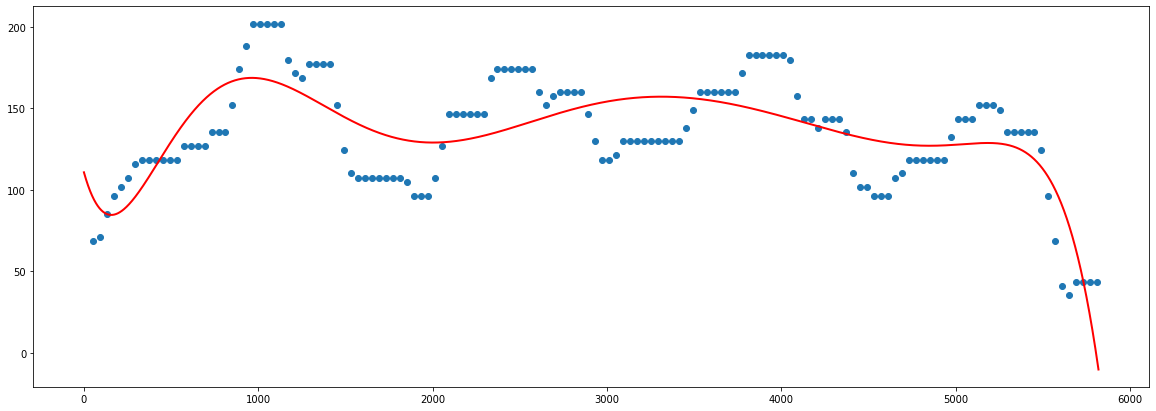

In [63]:
lastIntInX = int(X_train[-1])
X_poly_predict = np.arange(lastIntInX)
polynomial_model = make_pipeline(PolynomialFeatures(degree=9), Ridge())
polynomial_model.fit(X_train, Y_train)
Y_poly_predict = polynomial_model.predict(X_poly_predict.reshape(-1, 1))
plt.figure()
plt.figure(figsize=(20, 7))
plt.scatter(X_train[::10], Y_train[::10])
plt.plot(X_poly_predict, Y_poly_predict, color=('red'), linewidth=2,
                      label="degree 9")
plt.show()

In [41]:
save_to_csv(poly_reg_path, X_poly_predict, Y_poly_predict)

### test funkcji Ridge
### Flappy pokonal trasę bez normalizacji

![](Ridge_screanshot.png)

## Implementacja Linear Regression

In [278]:
from sklearn.preprocessing import MinMaxScaler

In [466]:
class LinearRegresionImpl:
    def __init__(self, X, y, degree=4):
        self.X = X
        self.y = y
        self.X_ = np.column_stack((np.ones((X.size, 1)), X))
        self.a = a_opt(self.X_, y)
        self.degree = [i for i in range(1, degree+1)]

    def a_opt(X,y) : # linear regression solution a = (X'X)^-1 X'y = pinv(X)y
        a_opt = np.dot( np.linalg.pinv(X), y)
        return a_opt
    
    def predict_linear(self, X_predict): #funkcja linearna
        return self.a[0] + self.a[1]*X_predict
    
    def predict_polymonial(self, xt, degree = 5): # funkcja polymonialna
        polyfit = np.polyfit(self.X, Y_lin_reg, degree)
        polycurve1d = np.poly1d(polyfit)
        return polycurve1d(xt)

In [304]:
X_lin_reg = train_df.iloc[:, 0].values
Y_lin_reg = train_df.iloc[:, 1].values

In [305]:
linreg = LinearRegresionImpl(X_linear_reg, Y_linear_reg)
Y_pred = linreg.predict_linear(X_poly_predict)

<Figure size 432x288 with 0 Axes>

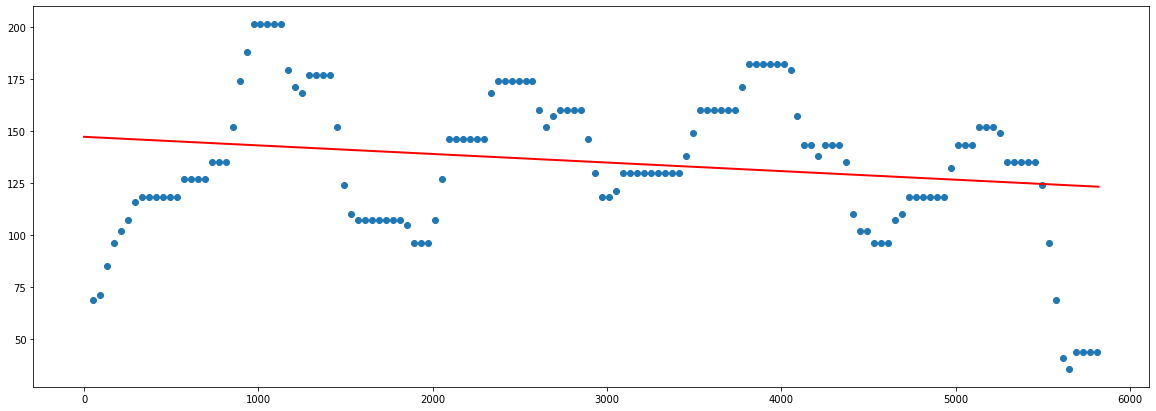

In [306]:
plt.figure()
plt.figure(figsize=(20, 7))
plt.scatter(X_train[::10], Y_train[::10])
plt.plot(X_poly_predict, Y_pred, color=('red'), linewidth=2,
                      label="degree 9")
plt.show()

In [307]:
linregpoly = LinearRegresionImpl(X_linear_reg, Y_linear_reg)
Y_pred_poly = linregpoly.predict_polymonial(X_poly_predict, degree=15)

<Figure size 432x288 with 0 Axes>

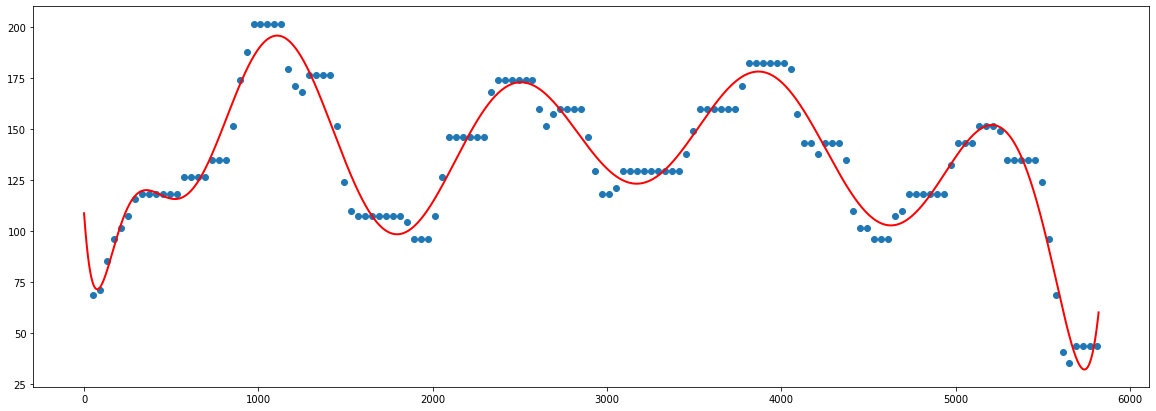

In [308]:
plt.figure()
plt.figure(figsize=(20, 7))
plt.scatter(X_train[::10], Y_train[::10])
plt.plot(X_poly_predict, Y_pred_poly, color=('red'), linewidth=2,
                      label="degree 9")
plt.show()

In [310]:
save_to_csv(lin_reg_impl_path, X_poly_predict, Y_poly_predict)

![](lin_impl_screanshot.png)

### Zaimplementowana Regresja liniowa działa w miarę szybko i pozwala na przejścię Flappy przez wszystkie rury, ale nie zawiera normalizaji dannych
### Była też próba zaiplementowania regresji polimonialnej za dopomogą:

### Ale niestety funkcja predict_polymonial nie mogla się dopasować do skomplikowanej ścieżki Flappy przy takiej implementacji

## Partje

In [442]:
election_df = pd.read_csv('C://Users//Ihor//GSN//PUM//Laboratorium 3//GoesGold//ElectionData.csv', parse_dates=['time'])

In [443]:
election_df = election_df.sort_values(by='time')

In [450]:
election_df['time_delta'] = (election_df['time'] - election_df['time'].min())  / np.timedelta64(1,'m')

In [451]:
election_df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,time_delta
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,0.000000
263,0,2019-10-06 20:10:02,Portalegre,0,2,69,23,136,1.86,139,...,13766,8489,A,0,0.37,0.38,27,0,0,0.000000
262,0,2019-10-06 20:10:02,Portalegre,0,2,69,23,136,1.86,139,...,13766,8489,R.I.R.,0,0.41,0.43,30,0,0,0.000000
261,0,2019-10-06 20:10:02,Portalegre,0,2,69,23,136,1.86,139,...,13766,8489,L,0,0.51,0.53,37,0,0,0.000000
260,0,2019-10-06 20:10:02,Portalegre,0,2,69,23,136,1.86,139,...,13766,8489,PAN,0,1.25,1.30,91,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21368,265,2019-10-07 00:35:01,Castelo Branco,4,0,120,120,2250,2.40,2232,...,181378,104223,MPT,0,0.24,0.25,226,0,0,264.983333
21367,265,2019-10-07 00:35:01,Castelo Branco,4,0,120,120,2250,2.40,2232,...,181378,104223,PNR,0,0.26,0.28,246,0,0,264.983333
21366,265,2019-10-07 00:35:01,Castelo Branco,4,0,120,120,2250,2.40,2232,...,181378,104223,PURP,0,0.29,0.31,273,0,0,264.983333
21376,265,2019-10-07 00:35:01,Coimbra,9,0,155,155,6889,3.38,3814,...,390947,220211,CDS-PP,0,3.48,3.68,7103,0,0,264.983333


In [610]:
parties = list(set(election_df['Party']))
print(parties)

['PURP', 'PS', 'PPM', 'B.E.', 'CDS-PP', 'JPP', 'CH', 'PCP-PEV', 'PAN', 'A', 'MPT', 'R.I.R.', 'L', 'IL', 'PPD/PSD', 'PDR', 'PTP', 'PCTP/MRPP', 'MAS', 'NC', 'PNR']


In [611]:
election_df.loc[election_df['Party'] == 'PS']['Mandates'].sum()

6068

In [612]:
time_ = {party:(election_df.loc[election_df['Party'] == party].groupby(['time_delta']).sum().index.values, \
                election_df.loc[election_df['Party'] == party].groupby(['time_delta']).sum()['Mandates'].values)\
                 for party in parties }

# Plot with sk_learn linear regression

In [467]:
parties = list(set(election_df['territoryName']))
print(parties)

['Território Nacional', 'Viana do Castelo', 'Porto', 'Évora', 'Leiria', 'Beja', 'Coimbra', 'Madeira', 'Portalegre', 'Castelo Branco', 'Vila Real', 'Viseu', 'Guarda', 'Setúbal', 'Bragança', 'Lisboa', 'Açores', 'Braga', 'Aveiro', 'Santarém', 'Faro']


<Figure size 432x288 with 0 Axes>

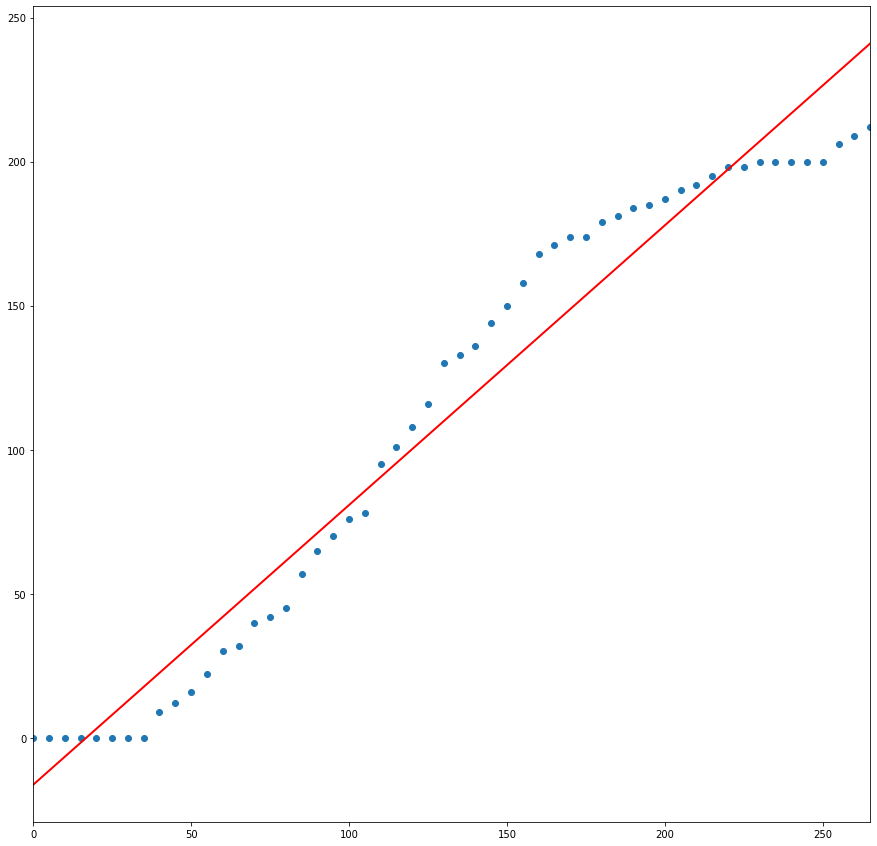

In [613]:
sk_linreg = linear_model.LinearRegression()
sk_linreg.fit(time_['PS'][0].reshape(-1, 1),time_['PS'][1].reshape(-1, 1))
prediction = sk_linreg.predict(time_['PS'][0].reshape(-1, 1))


plt.figure()
plt.figure(figsize=(15, 15))
plt.scatter(time_['PS'][0], time_['PS'][1])
plt.plot(time_['PS'][0], prediction, color=('red'), linewidth=2,
                      label="degree 9")
# prediction = polynomial_model.predict(time_['PS'][0].reshape(-1, 1))
plt.xlim(election_df['time_delta'].min(), election_df['time_delta'].max())
plt.show()

<Figure size 432x288 with 0 Axes>

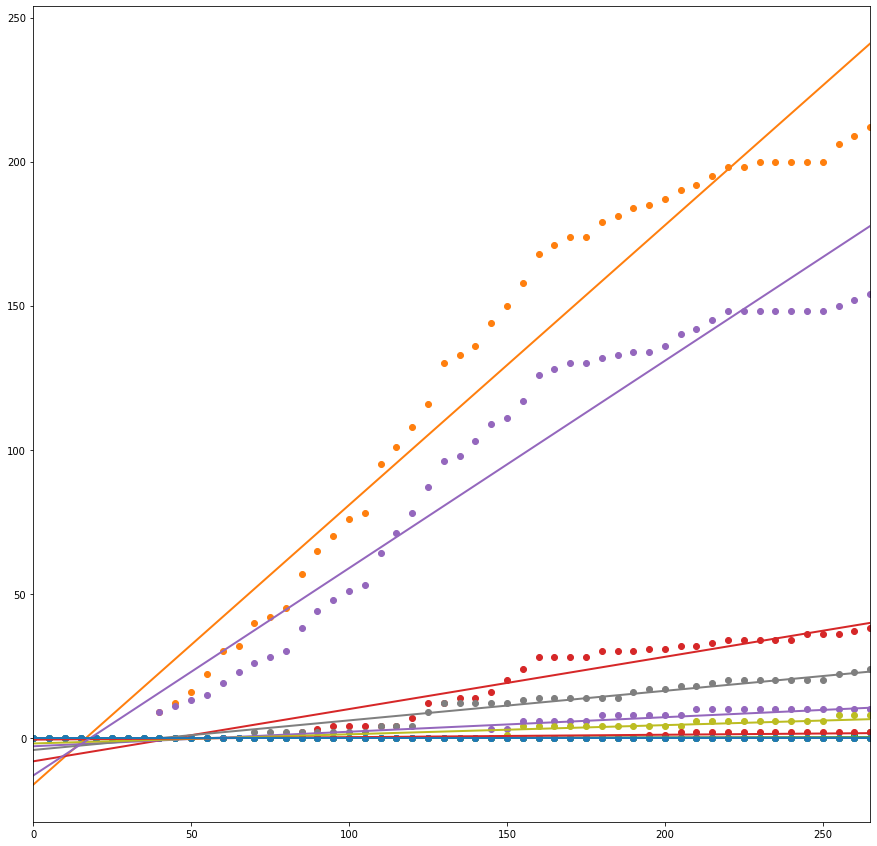

In [614]:
plt.figure()
plt.figure(figsize=(15, 15))
[plt.scatter(time_[party][0], time_[party][1]) for party in parties]
for party in parties:
    sk_linreg.fit(time_[party][0].reshape(-1, 1),time_[party][1].reshape(-1, 1))
    prediction = sk_linreg.predict(time_[party][0].reshape(-1, 1))
    plt.plot(time_[party][0], prediction, linewidth=2)
plt.xlim(election_df['time_delta'].min(), election_df['time_delta'].max())
plt.show()

# Plot with Wlasna implementacja

<Figure size 432x288 with 0 Axes>

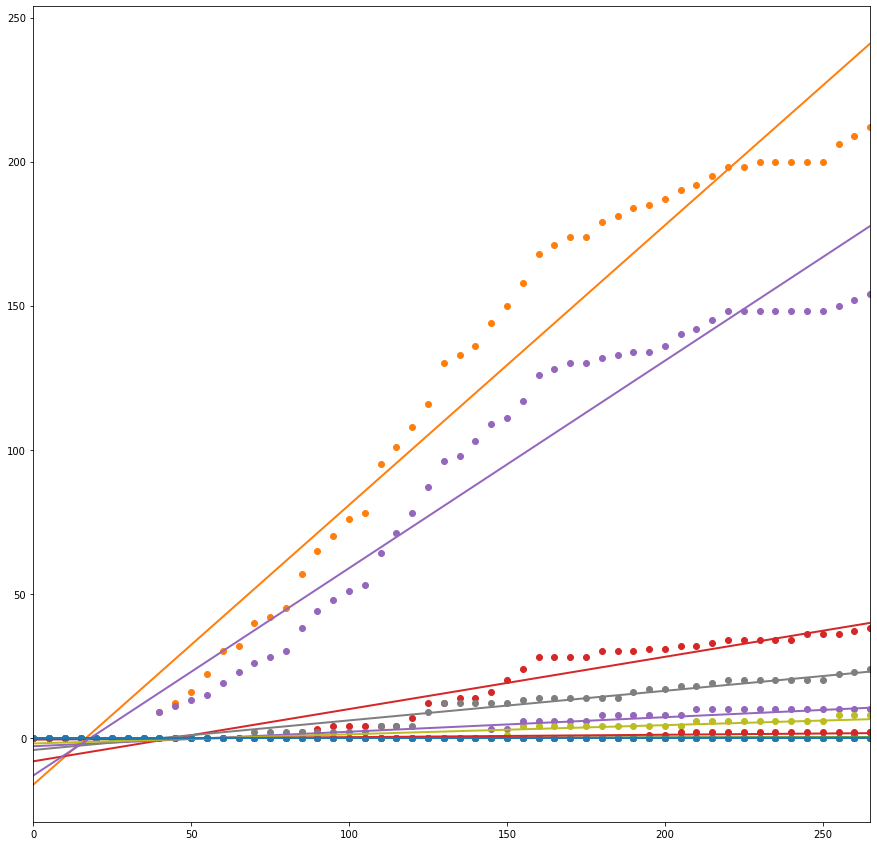

In [615]:
plt.figure()
plt.figure(figsize=(15, 15))
[plt.scatter(time_[party][0], time_[party][1]) for party in parties]
for party in parties:
    linreg = LinearRegresionImpl(time_[party][0], time_[party][1])
    prediction = linreg.predict_linear(time_[party][0])
#     sk_linreg.fit(time_[party][0].reshape(-1, 1),time_[party][1].reshape(-1, 1))
#     prediction = sk_linreg.predict(time_[party][0].reshape(-1, 1))
    plt.plot(time_[party][0], prediction, linewidth=2)
plt.xlim(election_df['time_delta'].min(), election_df['time_delta'].max())
plt.show()

# Wyszukiwanie najlepszego czasu dla otrzymania najlepszego wynniku partii sk_learn + bsearch

In [651]:
bigest_parties = ['PS', 'PPD/PSD', 'B.E.']

In [654]:
def binary_search(sequence, item):
    begin_index = 0
    end_index = len(sequence) - 1
    while begin_index <= end_index:
        midpoint = begin_index + (end_index - begin_index)//2
        midpoint_value = sequence[midpoint]
        if midpoint_value in list(range(item-4, item+4)):
            return midpoint
        elif item < midpoint_value:
            end_index = midpoint - 1
        else:
            begin_index = midpoint + 1
    return midpoint_value//2
                  

In [655]:
for party in bigest_parties:
    sk_linreg.fit(time_[party][1].reshape(-1, 1),time_[party][0].reshape(-1, 1))
    prediction = sk_linreg.predict(time_[party][1].reshape(-1, 1))
    timestamp = time_[party][0][binary_search(list(prediction.flatten(order='C').astype(int)), time_[party][1].max())]
    print(party + "party needs minimum " + str(timestamp) + " time to get " + \
          str(time_[party][1].max()) + " mandates in election")
    

PSparty needs minimum 215.0 time to get 212 mandates in election
PPD/PSDparty needs minimum 130.0 time to get 154 mandates in election
B.E.party needs minimum 130.0 time to get 38 mandates in election


In [660]:
for party in bigest_parties:
    sk_linreg.fit(time_[party][1].reshape(-1, 1),time_[party][0].reshape(-1, 1))
    prediction = sk_linreg.predict(time_[party][1].reshape(-1, 1))
    for i, predict in enumerate(prediction.flatten(order='C').astype(int)):
        if predict in list(range(time_[party][1].max()-15, time_[party][1].max()+15)):
            print(party + "party needs minimum " + str(predict) + " time to get " + \
                  str(time_[party][1].max()) + " mandates in election")
            break

PSparty needs minimum 198 time to get 212 mandates in election
PPD/PSDparty needs minimum 150 time to get 154 mandates in election
B.E.party needs minimum 52 time to get 38 mandates in election


# Wyszukiwanie najlepszego czasu dla otrzymania najlepszego wynniku partii wlasna implementacja + bsearch

In [661]:
for party in bigest_parties:
    linreg = LinearRegresionImpl(time_[party][1], time_[party][0])
    prediction = linreg.predict_linear(time_[party][1])
    timestamp = time_[party][0][binary_search(list(prediction.flatten(order='C').astype(int)), time_[party][1].max())]
    print(party + "party needs minimum " + str(timestamp) + " time to get " + \
          str(time_[party][1].max()) + " mandates in election")

PSparty needs minimum 215.0 time to get 212 mandates in election
PPD/PSDparty needs minimum 130.0 time to get 154 mandates in election
B.E.party needs minimum 130.0 time to get 38 mandates in election


In [662]:
for party in bigest_parties:
    linreg = LinearRegresionImpl(time_[party][1], time_[party][0])
    prediction = linreg.predict_linear(time_[party][1])
    for i, predict in enumerate(prediction.flatten(order='C').astype(int)):
        if predict in list(range(time_[party][1].max()-15, time_[party][1].max()+15)):
            print(party + "party needs minimum " + str(predict) + " time to get " + \
                  str(time_[party][1].max()) + " mandates in election")
            break

PSparty needs minimum 198 time to get 212 mandates in election
PPD/PSDparty needs minimum 150 time to get 154 mandates in election
B.E.party needs minimum 52 time to get 38 mandates in election


### Przez osobliwości algorytmu B-Search brak możliwości wyznaczyć minimalny czas dla partii B.E 

# Porwnanie Linear Regression sk-learn i wlasnej implementacji

In [666]:
party = 'PS'

In [667]:
from sklearn import metrics

In [668]:
import tracemalloc

In [680]:
%%time

tracemalloc.start()

##########################################################
for i in range(10000):
    sk_linreg.fit(time_[party][1].reshape(-1, 1),time_[party][0].reshape(-1, 1))
    prediction = sk_linreg.predict(time_[party][1].reshape(-1, 1))    
##########################################################

current, sk_learn_peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {sk_learn_peak / 10**6}MB")
tracemalloc.stop()

Current:0.151747MB; Peak was 0.159136MB
Wall time: 6.87 s


In [681]:
abs_er_sk = metrics.mean_absolute_error(time_[party][1], prediction)
sq_er_sk = metrics.mean_squared_error(time_[party][1], prediction)
mean_sq = np.sqrt(metrics.mean_squared_error(time_[party][1], prediction))
print(abs_er_sk)
print(sq_er_sk)
print(mean_sq)

20.121296296296308
405.8975358987365
20.14689891518634


In [682]:
%%time

tracemalloc.start()

##########################################################
for i in range(10000):
    linreg = LinearRegresionImpl(time_[party][1], time_[party][0])
    prediction = linreg.predict_linear(time_[party][1])  
##########################################################

current, my_lin_peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {my_lin_peak / 10**6}MB")
tracemalloc.stop()

Current:0.150058MB; Peak was 0.152554MB
Wall time: 2.14 s


In [684]:
abs_er = metrics.mean_absolute_error(time_[party][1], prediction)
sq_er = metrics.mean_squared_error(time_[party][1], prediction)
mean = np.sqrt(metrics.mean_squared_error(time_[party][1], prediction))
print(abs_er)
print(sq_er)
print(mean)

20.12129629629633
405.89753589873726
20.14689891518636


### Algorytmy czasowo dzialają bardzo szybko i pochlaniają podobną ilość pamięci, ale algorytm wlasnej implementacji ma brak wszytej normalizacji, a także nie może dzialać z dopasowaniem do skąplikowanych krzywych które się znajdują w  przestrzeniach większych niż 2D

### Zaimplementowana przez mnie regressja linjowa ma nieco większy bląd przy większej dokladności co może być problemem dla zadan które potrzebują wielkiej dokladności predykcji